In [45]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### 라이브러리 로드 및 초기설정

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [47]:
# 하나의 cell에서 print문을 사용하지 않고 multiple output 출력을 가능하게 하는 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# DataFrame의 사이즈가 큰 경우, 어떻게 화면에 출력을 할지 setting하는 코드
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('max_columns', None)

In [48]:
# 시스템 운영체제에 맞는 폰트를 불러와 적용하기
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

font_family = get_font_family()

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [49]:
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당합니다.

# 폰트설정
plt.rc("font", family=font_family)

# 마이너스 폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

### 데이터 불러오기

In [50]:
path_dir = '/content/gdrive/MyDrive/aiffel-hackathon/data'
file_list = os.listdir(path_dir)

In [51]:
file_list

['상가업소정보_201912_03.csv', '상가업소정보_201912_04.csv']

In [52]:
df = pd.read_csv(path_dir + '/상가업소정보_201912_03.csv', sep='|')
df.shape
df.head(2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(869907, 39)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,표준산업분류명,시도코드,시도명,시군구코드,시군구명,행정동코드,행정동명,법정동코드,법정동명,지번코드,대지구분코드,대지구분명,지번본번지,지번부번지,지번주소,도로명코드,도로명,건물본번지,건물부번지,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19943193,프리즐,NaN,Q,음식,Q04,분식,Q04A01,라면김밥분식,I56194,분식 및 김밥 전문점,41,경기도,41360,남양주시,4136025300,진접읍,4136025321,진접읍,4136025321206720001,1,대지,672,1.000,경기도 남양주시 진접읍 장현리 672-1,413603197028,경기도 남양주시 진접읍 봉현로,14,nan,4136025321106720001024396,NaN,경기도 남양주시 진접읍 봉현로 14,472865.000,12013.000,NaN,3.000,NaN,127.181,37.715
1,19943449,최씨네별난맛집,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,한식 음식점업,41,경기도,41250,동두천시,4125056500,불현동,4125010400,광암동,4125010400204940034,1,대지,494,34.000,경기도 동두천시 광암동 494-34,412504367026,경기도 동두천시 광암로33번길,15,nan,4125010400104940034000001,NaN,경기도 동두천시 광암로33번길 15,483040.000,11321.000,NaN,1.000,NaN,127.086,37.896


### 데이터 전처리

In [53]:
# 결측치 확인
df.isnull().sum()

상가업소번호            0
상호명               1
지점명          763443
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      57052
표준산업분류명       57052
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지        238875
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        699310
건물관리번호            0
건물명          498654
도로명주소             0
구우편번호           285
신우편번호            26
동정보          794604
층정보          441871
호정보          688190
경도                0
위도                0
dtype: int64

결측치가 많은 값들을 확인해보니 다른 값들로 대체하기도 어렵고, 없어도 무방한 것으로 판단되어 컬럼을 삭제해준다.

In [54]:
# 컬럼 list 조회
cols = df.columns
cols

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [55]:
# 결측치가 많은 컬럼 제거를 위한 변수 생성
missing_cols = ['지점명', '표준산업분류명', '지번부번지', '건물부번지', '건물명', '동정보', '층정보', '호정보']
missing_cols

['지점명', '표준산업분류명', '지번부번지', '건물부번지', '건물명', '동정보', '층정보', '호정보']

In [56]:
# 이외 불필요한 컬럼 제거를 위한 변수 생성
not_use_cols = cols[cols.str.contains('번호|코드')]
not_use_cols

Index(['상가업소번호', '상권업종대분류코드', '상권업종중분류코드', '상권업종소분류코드', '표준산업분류코드', '시도코드',
       '시군구코드', '행정동코드', '법정동코드', '지번코드', '대지구분코드', '도로명코드', '건물관리번호', '구우편번호',
       '신우편번호'],
      dtype='object')

In [62]:
# 추가적으로 삭제할 컬럼에 대한 변수 생성
drop_cols = ['행정동명', '대지구분명', '지번본번지', '건물본번지']

In [57]:
# 결측치 컬럼 삭제
print('기존 컬럼수', df.shape)
df = df.drop(missing_cols, axis=1)
print('변경 컬럼수', df.shape)

기존 컬럼수 (869907, 39)
변경 컬럼수 (869907, 31)


In [58]:
# 불필요한 컬럼 삭제1
print('기존 컬럼수', df.shape)
df = df.drop(not_use_cols, axis=1)
print('변경 컬럼수', df.shape)

기존 컬럼수 (869907, 31)
변경 컬럼수 (869907, 16)


In [63]:
# 불필요한 컬럼 삭제2
print('기존 컬럼수', df.shape)
df = df.drop(drop_cols, axis=1)
print('변경 컬럼수', df.shape)

기존 컬럼수 (869907, 16)
변경 컬럼수 (869907, 12)


In [64]:
df.head(2)

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,법정동명,지번주소,도로명,도로명주소,경도,위도
0,프리즐,음식,분식,라면김밥분식,경기도,남양주시,진접읍,경기도 남양주시 진접읍 장현리 672-1,경기도 남양주시 진접읍 봉현로,경기도 남양주시 진접읍 봉현로 14,127.181,37.715
1,최씨네별난맛집,음식,한식,한식/백반/한정식,경기도,동두천시,광암동,경기도 동두천시 광암동 494-34,경기도 동두천시 광암로33번길,경기도 동두천시 광암로33번길 15,127.086,37.896


In [79]:
df['지역'] = df['시도명'] + ' ' + df['시군구명']

In [66]:
df['시도명'].value_counts()

경기도     650152
강원도     120019
충청북도     99736
Name: 시도명, dtype: int64

In [81]:
df_gg = df[df['시도명'] == '경기도']
df_gg.shape

(650152, 13)

In [84]:
df_gg['지역'].unique()

array(['경기도 남양주시', '경기도 동두천시', '경기도 성남시 중원구', '경기도 성남시 분당구',
       '경기도 성남시 수정구', '경기도 구리시', '경기도 광명시', '경기도 안양시 만안구', '경기도 의정부시',
       '경기도 평택시', '경기도 안산시 단원구', '경기도 수원시 장안구', '경기도 고양시 일산동구',
       '경기도 고양시 덕양구', '경기도 안양시 동안구', '경기도 여주시', '경기도 양평군', '경기도 안성시',
       '경기도 시흥시', '경기도 광주시', '경기도 파주시', '경기도 화성시', '경기도 고양시 일산서구',
       '경기도 수원시 영통구', '경기도 안산시 상록구', '경기도 용인시 수지구', '경기도 연천군',
       '경기도 수원시 팔달구', '경기도 포천시', '경기도 수원시 권선구', '경기도 군포시', '경기도 용인시 기흥구',
       '경기도 부천시', '경기도 하남시', '경기도 양주시', '경기도 용인시 처인구', '경기도 오산시',
       '경기도 이천시', '경기도 의왕시', '경기도 과천시', '경기도 김포시', '경기도 가평군'],
      dtype=object)

In [85]:
# 쏘카 데이터에서 제공하는 시군구 데이터 리스트
df_gg_socar_zone_region_list = ['경기도 남양주시', '경기도 성남시 중원구', '경기도 성남시 분당구',
       '경기도 성남시 수정구', '경기도 구리시', '경기도 광명시', '경기도 안양시 만안구', '경기도 의정부시',
       '경기도 고양시 일산동구', '경기도 안양시 동안구', '경기도 양평군', '경기도 화성시', '경기도 고양시 일산서구',
       '경기도 하남시', '경기도 김포시']

In [90]:
# 쏘카 데이터에서 제공하는 시군구 데이터만 변수에 담아준다
df_gg_socar_zone = df_gg[df_gg['지역'].isin(df_gg_socar_zone_region_list)]

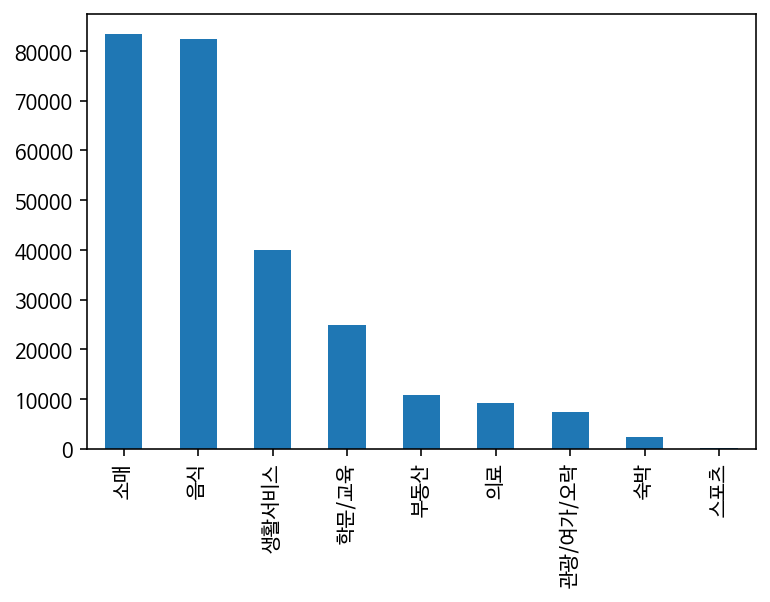

In [91]:
df_gg_socar_zone['상권업종대분류명'].value_counts().plot.bar()

In [92]:
df_gg_socar_zone[df_gg_socar_zone['상권업종대분류명'] == '음식']['상권업종중분류명'].value_counts()

한식         28425
유흥주점       11022
커피점/카페      9539
분식          7167
일식/수산물      6025
닭/오리요리      5630
제과제빵떡케익     3347
패스트푸드       3105
양식          3066
별식/퓨전요리     2159
중식          1950
부페           596
기타음식업        221
음식배달서비스       99
Name: 상권업종중분류명, dtype: int64

유흥주점, 커피점/카페, 패스트푸드, 제과제빵떡케익 등이 있는 곳이 20/30대가 몰리는 지역이지 않을까?

In [93]:
df_gg_socar_zone[df_gg_socar_zone['상권업종대분류명'] == '소매']['상권업종중분류명'].value_counts()

의복의류             14680
종합소매점            13878
음/식료품소매           8701
가정/주방/인테리어        8233
화장품소매             4542
사진/광학/정밀기기소매      4131
가방/신발/액세서리        3477
사무/문구/컴퓨터         3161
건강/미용식품           2983
철물/난방/건설자재소매      2546
선물/팬시/기념품         2487
자동차/자동차용품         2317
운동/경기용품소매         2227
기타판매업             1828
가구소매              1641
가전제품소매            1264
책/서적/도서            940
의약/의료품소매           939
시계/귀금속소매           820
중고품소매/교환           628
취미/오락관련소매          553
페인트/유리제품소매         388
애견/애완/동물           365
유아용품               319
예술품/골동품/수석/분재      268
종교용품판매              28
Name: 상권업종중분류명, dtype: int64

단편적으로 생각해봤을 때 쏘카존과 소매 업종의 상관관계는 별로 없어 보이긴 하나,
다른 가능성을 고민해볼 필요가 있다.

In [94]:
df_gg_socar_zone[df_gg_socar_zone['상권업종대분류명'] == '생활서비스']['상권업종중분류명'].value_counts()

이/미용/건강       19241
세탁/가사서비스       5092
자동차/이륜차        4780
개인/가정용품수리      1774
주택수리           1316
광고/인쇄          1117
인력/고용/용역알선      800
물품기기대여          762
기타서비스업          745
운송/배달/택배        731
개인서비스           713
주유소/충전소         680
사진              668
대중목욕탕/휴게        642
예식/의례/관혼상제      312
장례/묘지           258
대행업             178
행사/이벤트          136
법무세무회계           40
Name: 상권업종중분류명, dtype: int64

미용실이 많은 지역에 유동인구가 많지 않을까?  
세탁/가사서비스가 많은 지역에 오피스텔/원룸 등이 많이 있지 않을까?

In [96]:
df_gg_socar_zone[df_gg_socar_zone['상권업종대분류명'] == '학문/교육']['상권업종중분류명'].value_counts()

학원-보습교습입시     6281
학원-음악미술무용     4163
유아교육          3646
학원기타          3628
학원-어학         3614
학원-예능취미체육     1646
도서관/독서실        835
학문교육기타         463
학원-자격/국가고시     291
학원-컴퓨터         170
학원-창업취업취미      129
Name: 상권업종중분류명, dtype: int64

보습교습/유아교육/음악미술/어학/독서실 등은 아파트 단지에 많이 몰려 있지 않을까?

In [97]:
df_gg_socar_zone[df_gg_socar_zone['상권업종대분류명'] == '부동산']['상권업종중분류명'].value_counts()

부동산중개       9732
분양           763
평가/개발/관리     194
부동산관련서비스       1
Name: 상권업종중분류명, dtype: int64

In [98]:
df_gg_socar_zone[df_gg_socar_zone['상권업종대분류명'] == '의료']['상권업종중분류명'].value_counts()

병원          6189
약국/한약방      1909
수의업          597
유사의료업        345
의료관련서비스업      83
Name: 상권업종중분류명, dtype: int64

병원/약국이 많은 지역의 상권 특성을 분석해볼 필요가 있을 것이다.(다른 상권과 상관관계 여부)  

아파트 단지 주변에도 병원이 많지 않을까?

In [99]:
df_gg_socar_zone[df_gg_socar_zone['상권업종대분류명'] == '관광/여가/오락']['상권업종중분류명'].value_counts()

무도/유흥/가무        2823
PC/오락/당구/볼링등    2805
요가/단전/마사지       1242
경마/경륜/성인오락       186
연극/영화/극장         121
놀이/여가/취미          97
스포츠/운동            26
Name: 상권업종중분류명, dtype: int64

노래방, PC방, 요가/필라테스, 영화관 등이 영향을 미칠 수 있지 않을까? 

In [100]:
df_gg_socar_zone[df_gg_socar_zone['상권업종대분류명'] == '숙박']['상권업종중분류명'].value_counts()

모텔/여관/여인숙    1638
호텔/콘도         239
캠프/별장/펜션      232
민박/하숙         138
유스호스텔           3
Name: 상권업종중분류명, dtype: int64

통상적으로 유흥가/회사 주변에 모텔이 많이 있다. 이런 지역은 유동인구가 많을 것이다.  
쏘카존과는 어떤 관계가 있을까?

In [101]:
df_gg_socar_zone[df_gg_socar_zone['상권업종대분류명'] == '스포츠']['상권업종중분류명'].value_counts()

실내운동시설    125
운영관리시설     15
실외운동시설      3
Name: 상권업종중분류명, dtype: int64

운동시설과 쏘카존이 상관관계가 있을지는 잘 모르겠다.